In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

Linear_fit_perio_year_20161225.dat      Linear_fit_perio_year_20200121.dat
Linear_fit_perio_year_20161225.ipynb    Linear_fit_perio_year_20200121.ipynb
Linear_fit_perio_year_20161225.out      Linear_fit_perio_year_20200121.out
Linear_fit_perio_year_20161225_Res.jpg  Linear_fit_perio_year_20200121_Res.jpg
Linear_fit_perio_year_20170217.dat      Linear_fit_perio_year_20200122.dat
Linear_fit_perio_year_20170217.ipynb    Linear_fit_perio_year_20200122.ipynb
Linear_fit_perio_year_20170217.out      Linear_fit_perio_year_20200122.out
Linear_fit_perio_year_20170217_Res.jpg  Linear_fit_perio_year_20200122_Res.jpg


In [3]:
#Read data ---#1
Input = "Linear_fit_perio_year_20200121.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

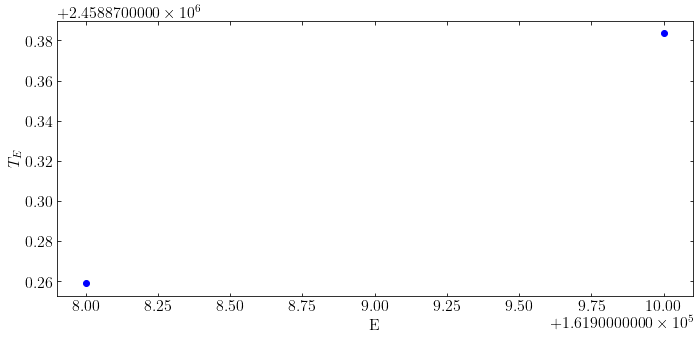

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

2


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc)
print(covariance)

Slope (m) is  0.062375405130111417
The error of the slope (dm) is  inf
Intercept (c) is  2448771.1817936637
The error of the intercept (dc) is  inf
[[inf inf]
 [inf inf]]


/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
# calculate the output for the range
y_line = linear_fit(x_line, m, c)

ys = m*x + c #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

np.savetxt("Linear_fit_perio_year_20200121.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[2458870.25888747 2458870.38363828]
[2458870.25888747 2458870.38363828]
[0. 0.]
nan


/var/folders/40/qs1cq6qj3mn08n4rf87fxb6m0000gn/T/ipykernel_5808/3069548958.py:18: RuntimeWarning: invalid value encountered in true_divide
  Chi_sqr = ((y - ys)**2/(dy)**2)/dof


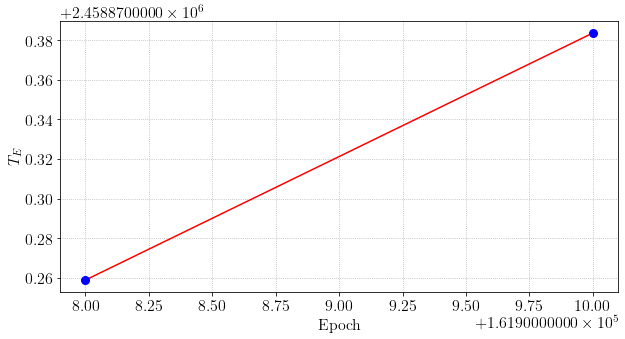

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x, ys, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

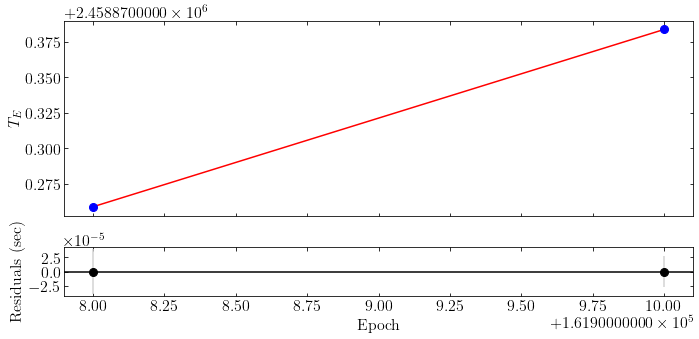

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x, ys, '-', color='red')

ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')

plt.savefig("Linear_fit_perio_year_20200121_Res.jpg", dpi=1000)

plt.show()